In [1]:
import os
import sys

from DIDV import processDIDV

pathToIO = os.path.abspath('/nervascratch/samwatkins/scdmsPyTools_temp/scdmsPyTools/scdmsPyTools/BatTools/')
if pathToIO not in sys.path:
    sys.path.append(pathToIO)

from IO import getRawEvents

pathToMakePlots = os.path.abspath('/nervascratch/samwatkins/scdmsPyTools/scdmsPyTools/Utilities/')
if pathToMakePlots not in sys.path:
    sys.path.append(pathToMakePlots)

from MakePlots import makePlots

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

from time import time


%matplotlib inline

In [2]:
Rshunt = 5.0e-3
Rbias_SG = 20000.0
Rfb = 5000.0
loopgain = 2.4
ADCperVolt = 65536.0/2.0
sampleRate = 625.0e3
sgFreq = 100.0
sgAmp = 0.009381 /Rbias_SG
drivergain = 4.0

convToAmps = Rfb * loopgain * drivergain * ADCperVolt

saveResults = False
fit = True

iChan = 1
nChan = 3
Rp = 0.0060367199999999998
Rload = Rshunt+Rp
dRload = 0.0001

# pathToData = '/nervadata/SLAC/Run31/byseries/TES_chips/19mK/'
# iFile = 9*(nChan+1)+iChan+1
# R0 = 0.061312430952305083
# dR0 = 0.00073454010609690394

# pathToData = '/nervadata/SLAC/Run31/byseries/TES_chips/57mK/'
# iFile = 10*(nChan+1)+iChan+1
# R0 = 0.02768045184830998
# dR0 = 0.00041036486987109711

pathToData = '/nervadata/SLAC/Run31/byseries/TES_chips/57mK/'
iFile = 5*(nChan+1)+iChan+1
R0 = 0.075570107054005367
dR0 = 8.96383052e-04

pathToSaveFile = ''

idArray = os.listdir(pathToData)[:-1]

events = getRawEvents(pathToData+idArray[iFile]+'/',idArray[iFile],channelList=['PAS2'],detectorList=[1])

fileSaveName = "DCRC1_PAS2_"+idArray[iFile]
rawTraces = events["DCRC1"]["PAS2"].values

priors = np.zeros(7)
invpriorsCov = np.zeros((7,7))
priors[0] = Rload
priors[1] = R0
invpriorsCov[0,0] = 1.0/dRload**2
invpriorsCov[1,1] = 1.0/dR0**2
dt0=np.array([-17.2e-6,-18.8e-6,-18.7e-6])

In [19]:
print 'Starting processing...'
start = time()
cut = autoCuts(rawTraces,sgFreq=100.0,traceGain=convToAmps,fs=sampleRate,isDIDV=True,symmetrizeFlag=False)
savedData = processDIDV(rawTraces[cut],priors=priors,invpriorsCov=invpriorsCov,timeOffset=0,
                        dt0=dt0[iChan],traceGain=convToAmps,testFreq=sgFreq,testAmplitude=sgAmp,
                        fs=sampleRate,dutycycle=0.5,add180Phase=False,fit=True,autoCut=False,
                        pathSave=pathToSaveFile,fileStr=fileSaveName,makePlots=False,
                        saveResults=saveResults,R0fit=R0,dR0=dR0,Rpfit=Rp,dRp=dRload,Rsh=Rshunt)

print(time()-start)
print("Done!")

Starting processing...


/data/analysis/packages/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:102: RuntimeWarning: overflow encountered in exp
/data/analysis/packages/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:102: RuntimeWarning: overflow encountered in multiply


634
629
619
612
608
40.3806169033
Done!


In [10]:
np.sqrt(len(rawTraces))/np.sqrt(282)

1.1012565357112796

In [8]:
print(savedData["TwoPoleTESparamsPriors"])
print(np.diag(savedData["TwoPoleTEScovPriors"])**0.5)
print(savedData["TwoPoleTEScostPriors"])

[  1.10367200e-02   7.55701071e-02   1.30433544e+00   1.70526390e+02
   2.11536028e-07   5.15864892e-03  -1.87441224e-05]
[  1.00000000e-04   8.96383052e-04   2.86200987e-02   1.04675296e+02
   4.54866975e-09   3.18497049e-03   1.94238903e-08]
3340.77020716


In [4]:
print(savedData["TwoPoleTESparamsPriors"])
print(np.diag(savedData["TwoPoleTEScovPriors"])**0.5)
print(savedData["TwoPoleTEScostPriors"])

[  1.10367200e-02   7.55701070e-02   1.31545076e+00   1.24178246e+02
   2.14842488e-07   3.79809864e-03  -1.87466941e-05]
[  1.00000000e-04   8.96383052e-04   2.85520254e-02   5.52547897e+01
   4.18886606e-09   1.70343244e-03   1.77695478e-08]
3285.84686


In [21]:
print(savedData["CIparams_freq_p2"])
print(np.diag(savedData["CIcov_freq_p2"])**0.5)
print(savedData["CIcost_freq_p2"])

[  2.91330709e-01   1.99469019e+00   1.89663189e-03   1.00075652e-06
  -1.88688157e-05]
[  3.12172339e-04   1.56913191e-02   1.51509530e-05   2.11582072e-08
   1.71677259e-08]
3998.57082633


In [17]:
print(savedData["CIparams_freq_p2"])
print(np.diag(savedData["CIcov_freq_p2"])**0.5)
print(savedData["CIcost_freq_p2"])

[  2.91338901e-01   1.96261953e+00   1.87363018e-03   9.97910275e-07
  -1.88710556e-05]
[  3.04454919e-04   1.59452592e-02   1.53353138e-05   2.05692243e-08
   1.66944583e-08]
3982.28975344


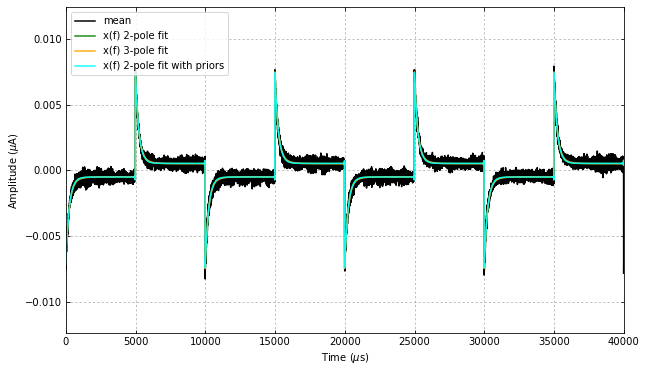

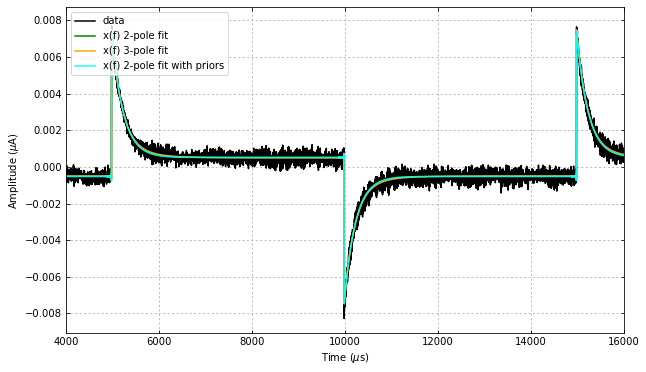

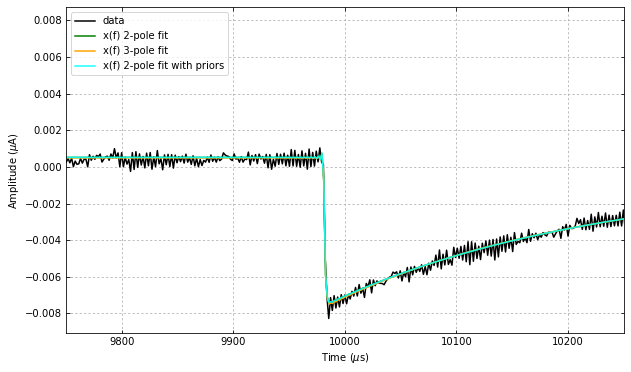

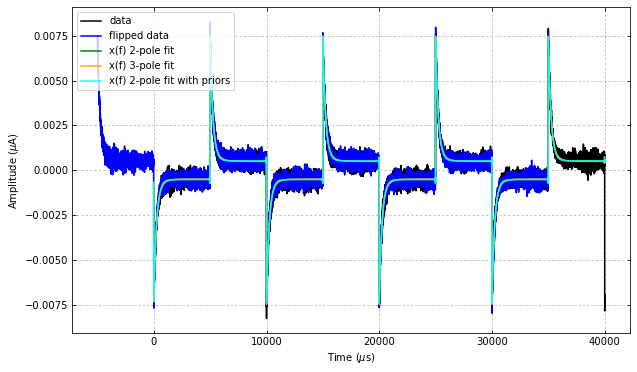

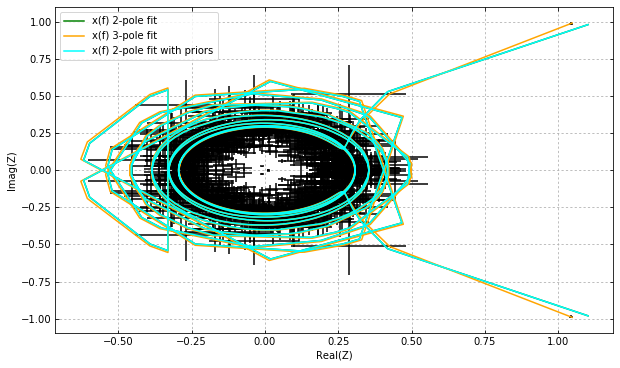

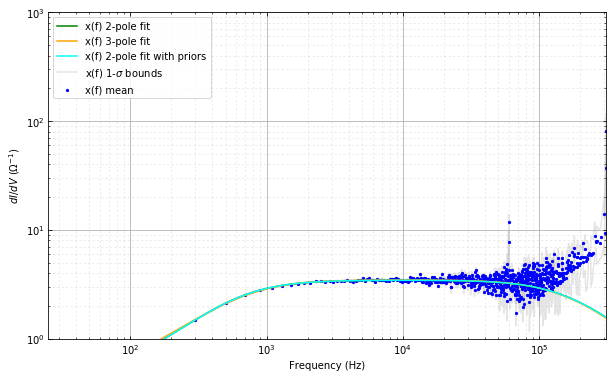

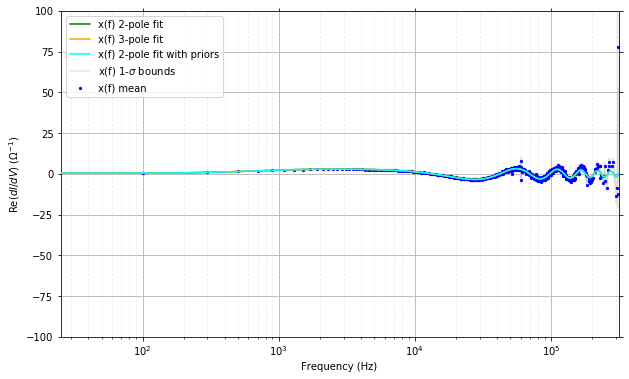

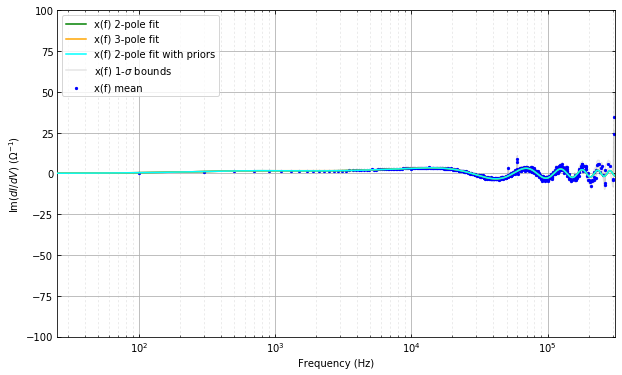

In [18]:
%matplotlib inline

makePlots(savedData,"DIDV",drawPlots=True,sgFreq=sgFreq)

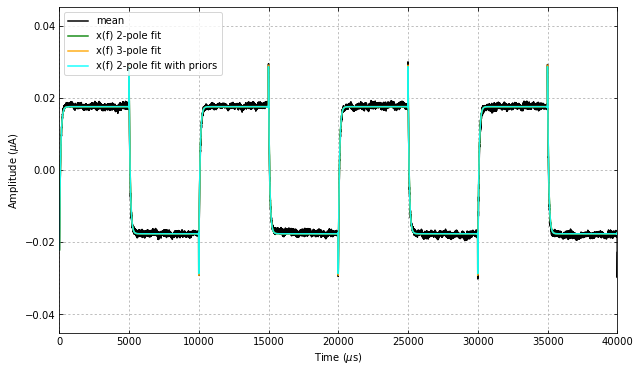

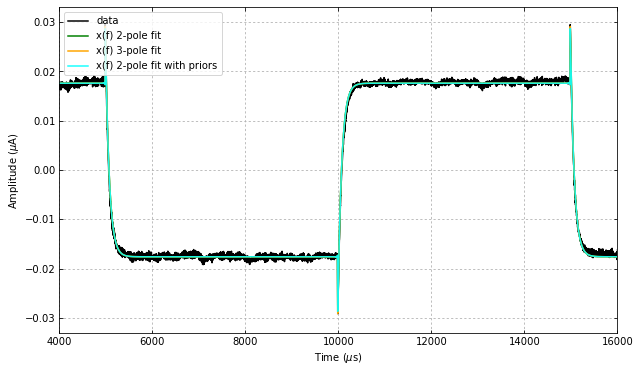

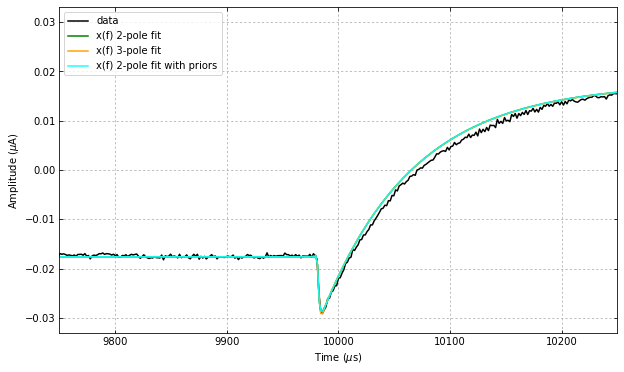

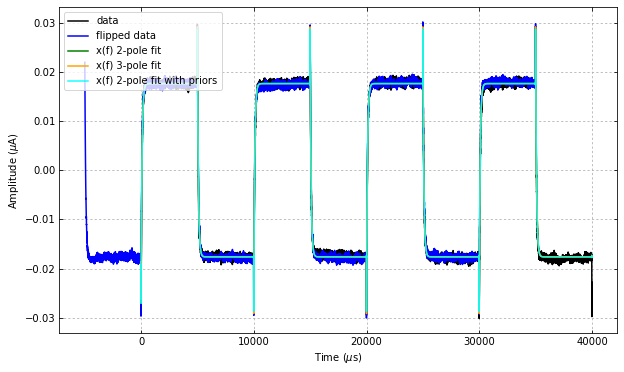

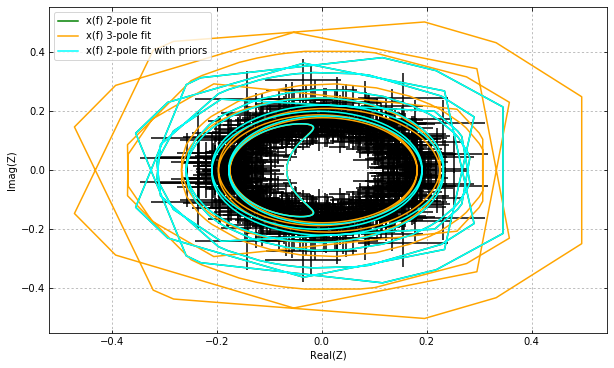

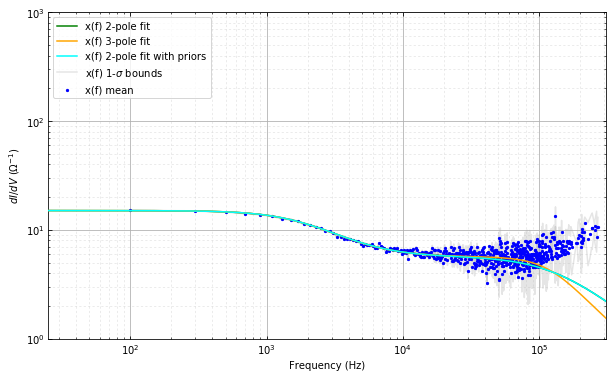

/galbadata/analysis/packages/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


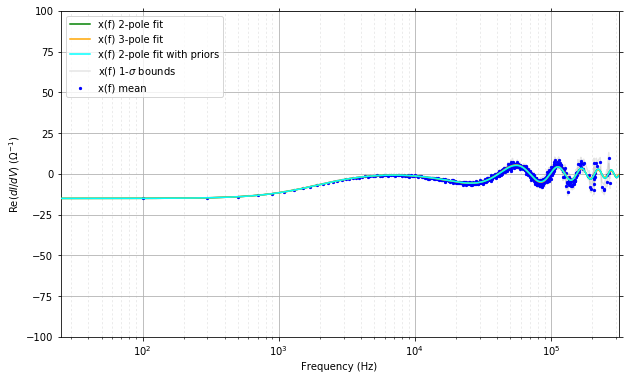

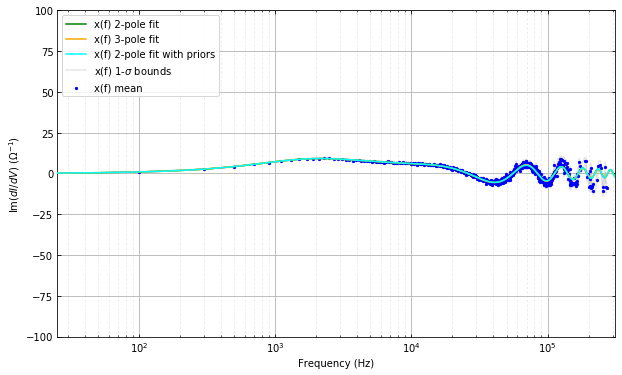

In [6]:
%matplotlib inline

makePlots(savedData,"DIDV",drawPlots=True,sgFreq=sgFreq)

In [3]:
import numpy as np
from scipy.stats import skew

import os
import sys
pathToTraces = os.path.abspath('/nervascratch/samwatkins/scdmsPyTools/scdmsPyTools/Traces')
if pathToTraces not in sys.path:
    sys.path.append(pathToTraces)

from Filtering import OptimumFilterAmplitude

import random
import matplotlib.pyplot as plt


#tries to symmetrize cut distribution to remove asymmetric outliers
def removeOutliers(x,maxiter=20,skewTarget=0.05):
    """Function to return indices of inlying points
    
    Arguments: 
    - x: Array of real-valued variables from which to remove outliers
    
    Optional Keyword Arguments:
    - maxiter (default 20): Maximum number of iterations to continue to minimize skewness
    - skewTarget (default 0.05): Desired residual skewness of distribution
    
    Returns:
    - inds: boolean indicies indicating which values to select/reject, same length as x
    """
    i=1
    inds=(x != np.inf)
    sk=skew(x[inds])
    while(sk > skewTarget):
        dmed=x-np.median(x[inds])
        dist=np.min([abs(min(dmed)),abs(max(dmed))])
        inds=inds & (abs(dmed) < dist)
        sk=skew(x[inds])
        if(i > maxiter):
            break
        i+=1

    return inds

def iterstat(data,cut=3,precision=1000.0):
    
    stdcutoff = np.std(data)/precision
    
    meanlast = np.mean(data)
    stdlast = np.std(data)
    
    nstable = 0
    keepgoing = True
    
    while keepgoing:
        mask = abs(data - meanlast) < cut*stdlast
        if sum(mask) <=1:
            print 'ERROR in iterstat: Number of events passing iterative cut is <= 1'
            print 'Iteration not converging properly.  Will return simple mean and std.'
            
            meanthis = np.mean(data)
            stdthis = np.std(data)
            mask = np.zeros(len(data),dtype=bool)
            break
        
        meanthis = np.mean(data[mask])
        stdthis = np.std(data[mask])
        
        if (abs(meanthis - meanlast) > stdcutoff) or (abs(stdthis - stdlast) > stdcutoff):
            nstable = 0
        else:
            nstable = nstable + 1
        if nstable >= 3:
            keepgoing = False
             
        meanlast = meanthis
        stdlast = stdthis
    
    datamean = meanthis
    datastd = stdthis
    datamask = mask
    
    return datamean,datastd,datamask

def autoCuts(rawTraces,traceGain=1.0,fs=625e3,sgFreq=200.0,isDIDV=False,symmetrizeFlag=False):
    # rawTraces = array containing all of the traces to be analyzed
    # traceGain = conversion to Amps
    # fs = sampleRate of data
    # sgFreq = frequency of square wave jitter (only applicable if this is a DIDV)
    # isDIDV = flag to indicate that this is DIDV data
    
    traces = rawTraces/traceGain # convert to Amps
    
    # Dummy pulse template
    nbin = len(rawTraces[0])
    ind_trigger = round(nbin/2)
    time = 1.0/fs *(np.arange(1,nbin+1)-ind_trigger)
    lgc_b0= time < 0.0
    
    # pulse shape
    tau_risepulse= 10.0e-6
    tau_fallpulse= 100.0e-6
    dummyTemplate = (1.0-np.exp(-time/tau_risepulse))*np.exp(-time/tau_fallpulse)
    dummyTemplate[lgc_b0]=0.0
    dummyTemplate = dummyTemplate/max(dummyTemplate)
    
    
    if isDIDV:
        # initialize amplitudes and chi2 from OF, as well as other needed quantities
        Amps = np.zeros(len(traces))
        Chi2 = np.zeros_like(Amps)
        traceBegin = np.zeros_like(Amps)
        traceEnd = np.zeros_like(Amps)
        AmpsSub = np.zeros_like(Amps)
        Chi2Sub = np.zeros_like(Amps)
        
        # number of periods and bins in period to determine where to calculate slopes and baselines
        nPeriods = np.floor((len(rawTraces[0])/fs)*sgFreq)
        binsinPeriod = fs/sgFreq
        
        slopeRangeBegin = range(int(binsinPeriod/4),int(binsinPeriod/4+binsinPeriod/8))
        slopeRangeEnd = range(int((nPeriods-1.0)*binsinPeriod+binsinPeriod/4),int((nPeriods-1.0)*binsinPeriod+binsinPeriod/4+binsinPeriod/8))
        
        dummyPSD = np.ones(round(nbin/2)+1)
        dummyPSD[0] = 1.0e15
        
        # First do optimum filter on all traces without Mean subtracted
        for iTrace in range(0,len(traces)):
            Amps[iTrace],t0,Chi2[iTrace] = OptimumFilterAmplitude(traces[iTrace],dummyTemplate,dummyPSD,fs,withDelay=True,normalize=False,coupling='AC')
            traceBegin[iTrace] = np.mean(rawTraces[iTrace][slopeRangeBegin])
            traceEnd[iTrace] = np.mean(rawTraces[iTrace][slopeRangeEnd])
        
        cPileup1 = iterstat(abs(Amps),cut=3,precision=10000.0)[2]
        cPileup1Inds = np.where(cPileup1)[0]
        print(sum(cPileup1))
        # now the slope cut to get rid of muon tails
        # first, create a symmetric distribution about zero slope to get rid of the biased results, but randomly cutting out events on biased side
        slopes = traceEnd - traceBegin
        
        # figure out which direction the slopes are usually
        slopesMean,slopesStd=iterstat(slopes[cPileup1Inds],cut=2,precision=10000.0)[:-1]
        
        # if most slopes are positive, flip the sign of them so we can use the same code for both negative and positive slopes
        if slopesMean>0.0:
            slopes= -slopes
        
        # choose symmetric upper and lower bounds for histogram to make the middle bin centered on zero (since we want zero mean)
        histUpr=max(slopes[cPileup1Inds])
        histLwr=-histUpr
        
        # specify number of bins in histogram (should be an odd number so that we have the middle bin centered on zero)
        nBins=int(np.sqrt(len(cPileup1Inds)))
        if np.mod(nBins,2)==0:
            nBins+=1
        
        # create histogram, get number of events in each bin and where the bin edges are
        hist_num,bin_edges=np.histogram(slopes[cPileup1Inds],bins=nBins,range=(histLwr,histUpr))
        
        if len(hist_num)>2 and symmetrizeFlag: # otherwise we cannot symmetrize the distribution
            # inititalize the cut that symmetrizes the slopes
            cZeroMeanGaussianSlope=np.zeros(len(cPileup1Inds),dtype=bool)
            cZeroMeanGaussianSlope[slopes[cPileup1Inds]>bin_edges[nBins/2]]=True
            
            slopesTemp = slopes[cPileup1Inds] # temporary variable to write less words
            
            # go through each bin and remove events until the bin number is symmetric
            for iBin in range(nBins/2,nBins-1):
                cSlopesinBin=np.logical_and(slopesTemp<bin_edges[nBins-iBin-1],slopesTemp>=bin_edges[nBins-iBin-2])
                nTracesInThisBin=hist_num[nBins-iBin-2]
                nTracesInOppoBin=hist_num[iBin+1]
                nTracesToRemove=nTracesInThisBin-nTracesInOppoBin
                if nTracesToRemove>0.0:
                    cSlopesinBinInds=np.where(cSlopesinBin)[0]
                    cRandCut=random.sample(cSlopesinBinInds,nTracesToRemove)
                    cSlopesinBin[cRandCut]=False
                cZeroMeanGaussianSlope+=cSlopesinBin # update cut to include these events
    
            cZeroMeanGaussianSlopeInds=cPileup1Inds[cZeroMeanGaussianSlope]
        else:
            # don't do anything about the shape of the distrbution
            cZeroMeanGaussianSlopeInds=cPileup1Inds
        
        # now run iterstat to get rid of outliers from the symmetrized distribution
        cSlope=iterstat(slopes[cZeroMeanGaussianSlopeInds],cut=3,precision=10000.0)[2]
        print(sum(cSlope))
        cSlopeInds=cZeroMeanGaussianSlopeInds[cSlope]
        
        # baseline cut
        cBaseline = iterstat(traceBegin[cSlopeInds],cut=3,precision=10000.0)[2]
        print(sum(cBaseline))
        cBaselineInds = cSlopeInds[cBaseline]
            
        # now mean the traces and subtract the mean to get rid of pileups within the DIDV trace
        meanTrace = np.mean(traces[cBaselineInds])
        tracesSub = np.array([traces[iTrace] for iTrace in range(0,len(traces))]) - np.matlib.repmat(meanTrace,len(traces),1)
        
        for iTrace in range(0,len(rawTraces)):
            AmpsSub[iTrace],t0,Chi2Sub[iTrace] = OptimumFilterAmplitude(tracesSub[iTrace],dummyTemplate,dummyPSD,fs,withDelay=True,normalize=False,coupling='AC')
        
        cPileup2 = iterstat(abs(AmpsSub[cBaselineInds]),cut=3,precision=10000.0)[2]
        print(sum(cPileup2))
        cPileup2Inds = cBaselineInds[cPileup2]
        
        # general chi2 cut
        cChi2 = iterstat(Chi2[cPileup2Inds],cut=3,precision=10000.0)[2]
        print(sum(cChi2))
        cChi2Inds = cPileup2Inds[cChi2]
        
        # convert total cut to logical array
        cTot = np.zeros(len(traces),dtype=bool)
        cTot[cChi2Inds] = True
        
    else:
        # initialize amplitudes and chi2 from OF, slopes and baselines
        Amps = np.zeros(len(traces))
        Chi2 = np.zeros_like(Amps)
        traceBegin = np.zeros_like(Amps)
        traceEnd = np.zeros_like(Amps)
        
        dummyPSD = np.ones(round(nbin/2)+1)
        dummyPSD[0] = 1.0e15
        
        # Calculate needed quantities
        for iTrace in range(0,len(rawTraces)):
            Amps[iTrace],t0,Chi2[iTrace] = OptimumFilterAmplitude(traces[iTrace],dummyTemplate,dummyPSD,fs,withDelay=True,normalize=False,coupling='AC')
            traceBegin[iTrace] = np.mean(rawTraces[iTrace][:nbin/10])
            traceEnd[iTrace] = np.mean(rawTraces[iTrace][9*nbin/10:])
        
        # first do a pileup cut
        cPileup = iterstat(abs(Amps),cut=2,precision=10000.0)[2]
        cPileupInds = np.where(cPileup)[0] # convert to numerical indexing for easier iterative cutting
        
        # now the slope cut to get rid of muon tails
        # first, create a symmetric distribution about zero slope to get rid of biased results, but randomly cutting out events on biased side
        slopes = traceEnd - traceBegin
        
        # figure out which direction the slopes are usually
        slopesMean,slopesStd=iterstat(slopes[cPileupInds],cut=2,precision=10000.0)[:-1]
        
        # if most slopes are positive, flip the sign of them so we can use the same code for both negative and positive slopes
        if slopesMean>0.0:
            slopes= -slopes
        # choose symmetric upper and lower bounds for histogram to make the middle bin centered on zero (since we want zero mean)
        histUpr=max(slopes[cPileupInds])
        histLwr=-histUpr
        
        if histUpr==histLwr:
            histLwr=-1
            histUpr=1
            
        # specify number of bins in histogram (should be an odd number so that we have the middle bin centered on zero)
        nBins=int(np.sqrt(len(cPileupInds)))
        if np.mod(nBins,2)==0:
            nBins+=1
        
        # create histogram, get number of events in each bin and where the bin edges are
        hist_num,bin_edges=np.histogram(slopes[cPileupInds],bins=nBins,range=(histLwr,histUpr))
        
        if len(hist_num)>2 and symmetrizeFlag: # otherwise we cannot symmetrize the distribution
            # inititalize the cut that symmetrizes the slopes
            cZeroMeanGaussianSlope=np.zeros(len(cPileupInds),dtype=bool)
            cZeroMeanGaussianSlope[slopes[cPileupInds]>bin_edges[nBins/2]]=True
            
            slopesTemp = slopes[cPileupInds] # temporary variable to write less words
            
            # go through each bin and remove events until the bin number is symmetric
            for iBin in range(nBins/2,nBins-1):
                cSlopesinBin=np.logical_and(slopesTemp<bin_edges[nBins-iBin-1],slopesTemp>bin_edges[nBins-iBin-2])
                nTracesInThisBin=hist_num[nBins-iBin-2]
                nTracesInOppoBin=hist_num[iBin+1]
                nTracesToRemove=nTracesInThisBin-nTracesInOppoBin
                if nTracesToRemove>0.0:
                    cSlopesinBinInds=np.where(cSlopesinBin)[0]
                    cRandCut=random.sample(cSlopesinBinInds,nTracesToRemove)
                    cSlopesinBin[cRandCut]=False
                cZeroMeanGaussianSlope+=cSlopesinBin # update cut to include these events
        
            cZeroMeanGaussianSlopeInds=cPileupInds[cZeroMeanGaussianSlope]
        else:
            # don't do anything about the shape of the distrbution
            cZeroMeanGaussianSlopeInds=cPileupInds
        
        # now run iterstat to get rid of outliers from the symmetrized distribution
        cSlope=iterstat(slopes[cZeroMeanGaussianSlopeInds],cut=2,precision=10000.0)[2]
        cSlopeInds=cZeroMeanGaussianSlopeInds[cSlope]
        
        # then do the baseline cut
        cBaseline = iterstat(traceBegin[cSlopeInds],cut=2,precision=10000.0)[2]
        cBaselineInds = cSlopeInds[cBaseline]
        
        # then do the general chi2 cut
        cChi2 = iterstat(Chi2[cBaselineInds],cut=3,precision=10000.0)[2]
        cTotInds = cBaselineInds[cChi2]
        
        # total cut to a logical array
        cTot = np.zeros(len(traces),dtype=bool)
        cTot[cTotInds] = True
        
    return cTot


In [8]:
sum(autoCuts(rawTraces,sgFreq=100.0,traceGain=convToAmps,fs=sampleRate,isDIDV=True))

/data/analysis/packages/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:102: RuntimeWarning: overflow encountered in exp
/data/analysis/packages/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:102: RuntimeWarning: overflow encountered in multiply


280
234
181
110
103


In [10]:
autoCuts(rawTraces,sgFreq=100.0,traceGain=convToAmps,fs=sampleRate,isDIDV=True);

/data/analysis/packages/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:102: RuntimeWarning: overflow encountered in exp
/data/analysis/packages/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:102: RuntimeWarning: overflow encountered in multiply


328
326
318
317
316
